In [2]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file_loc='../ADNI_data/'
df_DS=pd.read_csv(file_loc + 'DXSUM_PDXCONV_ADNIALL_21Dec2023.csv')
df_GDS=pd.read_csv(file_loc + 'GDSCALE_12Jan2024.csv')
df_medhist_disease = pd.read_csv(
    file_loc + 'df_medhist_disease_depression.csv')
df_NPIQ=pd.read_csv(file_loc + 'NPIQ_05Mar2024.csv')
df_medhist_disease.head()

,Unnamed: 0,RID,1
0,0,14,"['depress', '1988', 'treat', 'antidepress', 't..."
1,1,14,"['depress', '1988', 'treat', 'antidepress', 't..."
2,2,20,"['mild', 'depress', 'start', '7/1993', 'treat'..."
3,3,20,"['mild', 'depress', 'start', '7/1993', 'treat'..."
4,4,26,"['depress', 'six', 'month', 'ago', 'treat', 'c..."


In [4]:
df_DS.columns

Index(['Phase', 'ID', 'RID', 'PTID', 'SITEID', 'VISCODE', 'VISCODE2',
       'VISDATE', 'USERDATE', 'USERDATE2', 'EXAMDATE', 'DXCHANGE', 'DXCURREN',
       'DXCONV', 'DXCONTYP', 'DXREV', 'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES',
       'DXMPTR1', 'DXMPTR2', 'DXMPTR3', 'DXMPTR4', 'DXMPTR5', 'DXMPTR6',
       'DXMDUE', 'DXMOTHET', 'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES', 'DXAPP',
       'DXAPROB', 'DXAPOSS', 'DXPARK', 'DXPDES', 'DXPCOG', 'DXPATYP', 'DXDEP',
       'DXOTHDEM', 'DXODES', 'DXCONFID', 'DIAGNOSIS', 'update_stamp'],
      dtype='object')

In [5]:
df_DS[['RID','Phase','VISCODE2','DXDEP']].drop_duplicates().DXDEP.value_counts()

0.0    8265
1.0     825
Name: DXDEP, dtype: int64

In [6]:
df_GDS.columns

Index(['Phase', 'ID', 'PTID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2',
       'VISDATE', 'USERDATE', 'USERDATE2', 'EXAMDATE', 'GDSOURCE', 'GDUNABL',
       'GDSATIS', 'GDDROP', 'GDEMPTY', 'GDBORED', 'GDSPIRIT', 'GDAFRAID',
       'GDHAPPY', 'GDHELP', 'GDHOME', 'GDMEMORY', 'GDALIVE', 'GDWORTH',
       'GDENERGY', 'GDHOPE', 'GDBETTER', 'GDTOTAL', 'GDDATE', 'update_stamp'],
      dtype='object')

In [7]:
df_gds_dep=df_GDS[['RID','Phase','VISCODE2','GDTOTAL']].drop_duplicates().merge(df_DS[['RID','VISCODE2','DXDEP']].drop_duplicates(),on=['RID','VISCODE2']).dropna().sort_values(by='DXDEP')
df_gds_dep.shape

(7527, 5)

In [8]:
df_gds_dep

,RID,Phase,VISCODE2,GDTOTAL,DXDEP
2240,830,ADNIGO,m60,1.0,0.0
7229,6027,ADNI3,sc,0.0,0.0
7228,6021,ADNI3,sc,0.0,0.0
7227,6025,ADNI3,sc,0.0,0.0
7225,6023,ADNI3,sc,2.0,0.0
...,...,...,...,...,...
6698,4262,ADNI2,m48,7.0,1.0
8919,4514,ADNI3,m102,9.0,1.0
5176,4061,ADNI2,m24,4.0,1.0
5151,4863,ADNI2,m12,4.0,1.0


In [9]:
df_gds_dep.groupby('DXDEP').GDTOTAL.mean()

DXDEP
0.0    1.351816
1.0    4.567308
Name: GDTOTAL, dtype: float64

<AxesSubplot:>

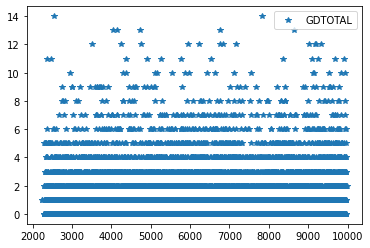

In [10]:
df_gds_dep[['GDTOTAL']].plot(marker='*', linestyle='none' )

In [11]:
# df_gds_dep[df_gds_dep['GDTOTAL']<7].groupby('DXDEP').GDTOTAL.mean()

In [12]:
df_DS[['RID','DXNODEP']][df_DS['DXNODEP']==1].drop_duplicates().DXNODEP.value_counts()

1.0    63
Name: DXNODEP, dtype: int64

In [13]:
len(df_DS[['RID','DXNODEP']][df_DS['DXNODEP']==1].drop_duplicates().RID.tolist())

63

<AxesSubplot:>

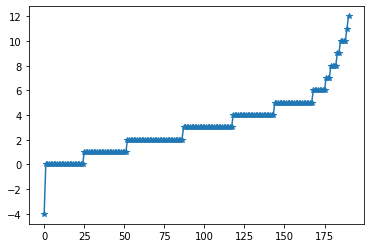

In [14]:
df_GDS[['RID','GDTOTAL']][df_GDS.RID.isin(df_DS[['RID','DXNODEP']][df_DS['DXNODEP']==1].drop_duplicates().RID.tolist())].sort_values(by='GDTOTAL').drop_duplicates().dropna()['GDTOTAL'].plot(marker='*',use_index=False)

In [15]:
df_gds_dep[df_gds_dep['RID'].isin(df_medhist_disease['RID'].unique().tolist())].head()

,RID,Phase,VISCODE2,GDTOTAL,DXDEP
7223,5289,ADNI3,m42,0.0,0.0
7220,4367,ADNI3,m66,0.0,0.0
7211,5079,ADNI3,m48,2.0,0.0
7258,4767,ADNI3,m60,3.0,0.0
7252,2119,ADNI3,m78,1.0,0.0


In [16]:
df_gds_dep[df_gds_dep['RID'].isin(df_medhist_disease['RID'].unique().tolist())].groupby('DXDEP').GDTOTAL.describe()

,count,mean,std,min,25%,50%,75%,max
DXDEP,,,,,,,,
0.0,1426.0,1.7223,1.599129,0.0,0.0,1.0,3.0,12.0
1.0,350.0,4.4800,2.905069,0.0,2.0,4.0,6.0,14.0


In [17]:
df_DS[df_DS['RID'].isin(df_medhist_disease['RID'].unique().tolist())].DXDEP.value_counts()

0.0    1662
1.0     384
Name: DXDEP, dtype: int64

In [18]:
df_gds_dep[df_gds_dep['RID'].isin(df_medhist_disease['RID'].unique().tolist())].head()

,RID,Phase,VISCODE2,GDTOTAL,DXDEP
7223,5289,ADNI3,m42,0.0,0.0
7220,4367,ADNI3,m66,0.0,0.0
7211,5079,ADNI3,m48,2.0,0.0
7258,4767,ADNI3,m60,3.0,0.0
7252,2119,ADNI3,m78,1.0,0.0


In [19]:
df_gds_dep[df_gds_dep['RID'].isin(df_medhist_disease['RID'].unique().tolist())].DXDEP.value_counts()

0.0    1426
1.0     350
Name: DXDEP, dtype: int64

In [20]:
df_gds_dep.Phase.value_counts()

ADNI2     4826
ADNI3     2700
ADNIGO       1
Name: Phase, dtype: int64

In [21]:
df_DS.Phase.value_counts()

ADNI2     5671
ADNI1     3868
ADNI3     3499
ADNIGO     475
Name: Phase, dtype: int64

In [22]:
df_DS.groupby('Phase').DXNODEP.value_counts()

Phase  DXNODEP
ADNI1  -4.0       3783
        1.0         85
Name: DXNODEP, dtype: int64

In [23]:
df_DS.groupby('Phase').DXDEP.value_counts()

Phase  DXDEP
ADNI2  0.0      5153
       1.0       518
ADNI3  0.0      3112
       1.0       307
Name: DXDEP, dtype: int64

In [24]:
df_gds_dep.groupby('Phase').DXDEP.value_counts()

Phase   DXDEP
ADNI2   0.0      4362
        1.0       464
ADNI3   0.0      2436
        1.0       264
ADNIGO  0.0         1
Name: DXDEP, dtype: int64

In [25]:
df_gds_dep.groupby(['Phase','DXDEP']).GDTOTAL.mean()

Phase   DXDEP
ADNI2   0.0      1.365658
        1.0      4.413793
ADNI3   0.0      1.327176
        1.0      4.837121
ADNIGO  0.0      1.000000
Name: GDTOTAL, dtype: float64

In [26]:
df_gds_dep.groupby(['Phase','DXDEP']).RID.nunique()

Phase   DXDEP
ADNI2   0.0      1344
        1.0       284
ADNI3   0.0      1238
        1.0       189
ADNIGO  0.0         1
Name: RID, dtype: int64

In [27]:
df_gds_nodep=df_GDS[['RID','Phase','VISCODE2','GDTOTAL']].drop_duplicates().merge(df_DS[['RID','VISCODE2','DXNODEP']].drop_duplicates(),on=['RID','VISCODE2']).dropna().sort_values(by='DXNODEP')
df_gds_nodep.shape

(1939, 5)

In [28]:
df_gds_nodep.groupby(['Phase','DXNODEP']).GDTOTAL.mean()

Phase  DXNODEP
ADNI1  -4.0       1.598318
        1.0       4.486486
Name: GDTOTAL, dtype: float64

In [29]:
df_gds_nodep.groupby('Phase').DXNODEP.value_counts()

Phase  DXNODEP
ADNI1  -4.0       1902
        1.0         37
Name: DXNODEP, dtype: int64

In [30]:
df_gds_nodep.groupby(['Phase','DXNODEP']).RID.nunique()

Phase  DXNODEP
ADNI1  -4.0       738
        1.0        30
Name: RID, dtype: int64

In [32]:
df_NPIQ_dep=df_NPIQ[['RID','Phase','VISCODE2','NPID']].drop_duplicates().merge(df_DS[['RID','VISCODE2','DXDEP']].drop_duplicates(),on=['RID','VISCODE2']).dropna().sort_values(by='DXDEP')
df_NPIQ_dep.shape

(729, 5)

In [35]:
df_NPIQ_dep[['NPID','DXDEP']].value_counts()

NPID  DXDEP
0.0   0.0      539
1.0   0.0      130
      1.0       39
0.0   1.0       21
dtype: int64

In [42]:
df_NPIQ_nodep=df_NPIQ[['RID','Phase','VISCODE2','NPID']].drop_duplicates().merge(df_DS[['RID','VISCODE2','DXNODEP']].drop_duplicates(),on=['RID','VISCODE2']).dropna().sort_values(by='DXNODEP')
df_NPIQ_nodep.shape

(3868, 5)

In [44]:
df_NPIQ_nodep[['NPID','DXNODEP']].value_counts()

NPID  DXNODEP
 0.0  -4.0       2945
 1.0  -4.0        806
       1.0         53
 0.0   1.0         31
 2.0  -4.0         18
-1.0  -4.0         14
       1.0          1
dtype: int64

In [40]:
df_NPIQ[['RID','Phase','VISCODE2','NPID']].drop_duplicates().NPID.value_counts()

 0.0    5525
 1.0    1494
 2.0      20
-1.0      18
Name: NPID, dtype: int64